In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

infos = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq.xls")

runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", 
        "20220729_K562R1", "20220729_K562R2"]

In [3]:
vmax = 10
array1 = []
array2 = []
for run in runs:
    for cell in infos[infos["Run"] == run]["Cell"]:
        path = "../../1_NanoNASCseq/results/mapping/processed/%s/%s.tsv" % (run, cell)
        d = pd.read_csv(path, sep="\t", header=0)
        counter1 = defaultdict(int)
        counter2 = defaultdict(int)
        for c1, c2, count in d[["HeadClip", "TailClip", "Count"]].values:
            counter1[c1] += count
            counter2[c2] += count
        ys1 = [counter1[i] for i in range(vmax)]
        ys2 = [counter2[i] for i in range(vmax)]
        ys1.append(sum(counter1.values()) - sum(ys1))
        ys2.append(sum(counter2.values()) - sum(ys2))
        array1.append(ys1)
        array2.append(ys2)

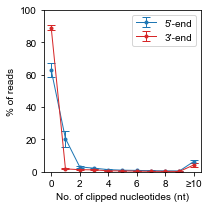

In [4]:
m1 = pd.DataFrame(array1)
m1 = m1.divide(m1.sum(axis=1), axis=0) * 100
m2 = pd.DataFrame(array2)
m2 = m2.divide(m2.sum(axis=1), axis=0) * 100

plt.figure(figsize=(3, 3))

ys1 = m1.mean(axis=0)
yerr1 = m1.std(axis=0)
xs1 = np.arange(len(ys1))
plt.errorbar(xs1, ys1, yerr=yerr1, marker=".", lw=1, capsize=4, capthick=1, color="C0", label="5'-end")

ys2 = m2.mean(axis=0)
yerr2 = m2.std(axis=0)
xs2 = np.arange(len(ys2))
plt.errorbar(xs2, ys2, yerr=yerr2, marker=".", lw=1, capsize=4, capthick=1, color="C3", label="3'-end")

xs3 = np.arange(0, 11, 2)
xticks = [str(x) for x in xs3]
xticks[-1] = "≥%s" % xticks[-1]

plt.xticks(xs3, xticks)
plt.ylim(0, 100)
plt.xlabel("No. of clipped nucleotides (nt)")
plt.ylabel("% of reads")
plt.xlim(min(xs1) - 0.5, max(xs1) + 0.5)
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig("figures/stat_clip.pdf", dpi=300)

In [6]:
rs = []
for run in runs:
    for cell in infos[infos["Run"] == run]["Cell"]:
        path = "../../1_NanoNASCseq/results/mapping/processed/%s/%s.log" % (run, cell)
        r = float(open(path).readlines()[1].strip().split("\t")[2])
        rs.append(r)

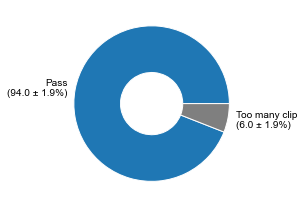

In [7]:
mean, std = np.mean(rs), np.std(rs)

plt.figure(figsize=(4, 3))
plt.pie([mean, 1 - mean], 
        labels=["Pass\n(%.1f ± %.1f%%)" % (mean * 100, std * 100), 
                "Too many clip\n(%.1f ± %.1f%%)" % ((1 - mean) * 100, std * 100)],
        colors=["C0", "C7"], 
        wedgeprops=dict(width=0.6, edgecolor='w'))
plt.tight_layout()
plt.savefig("figures/stat_clip.pie.pdf", dpi=300)